In [264]:
import numpy as np
import pandas as pd

In [265]:
df = pd.read_csv('spam.csv')

In [266]:
df.sample(10) # this command is used to display the sample data frame for the data set we read here!

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
242,ham,"Okay. No no, just shining on. That was meant t...",NaN,NaN,NaN
2813,ham,"Alright if you're sure, let me know when you'r...",NaN,NaN,NaN
439,ham,But i have to. I like to have love and arrange.,NaN,NaN,NaN
4762,ham,Prepare to be pleasured :),NaN,NaN,NaN
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...,NaN,NaN,NaN
1933,ham,R u over scratching it?,NaN,NaN,NaN
3390,ham,"I'm in a meeting, call me later at",NaN,NaN,NaN
3319,ham,Eh sorry leh... I din c ur msg. Not sad alread...,NaN,NaN,NaN
3667,ham,Thanks for loving me so. You rock,NaN,NaN,NaN
4936,ham,G wants to know where the fuck you are,NaN,NaN,NaN


In [267]:
#Steps we will follow goinf forward...
#1. Data Cleaning
#2. EDA (Exploratory Data Analysis)
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements
#7. Website
#8. Deployment


## 1. Data Cleaning

In [268]:
# First we will gather the info about the data and how data is distributed in the spam.csv file!
# Hence we will use :
df.info()
# On using this we will be able to see that There are 5 cols and out of which 3 has very less non-null values, means those cols are not worth enough to carry forward in the data analysis, so we will remove those cols!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [269]:
# Removing/Dropping last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [270]:
# In the above cell we have removed the last 3 cols, now we will look at the updated data frame again...
df.sample(10)

,v1,v2
2515,ham,Bognor it is! Should be splendid at this time ...
5020,ham,:-( sad puppy noise
861,ham,Your brother is a genius
4604,ham,"I need an 8th but I'm off campus atm, could I ..."
2642,ham,"They can try! They can get lost, in fact. Tee hee"
3575,ham,The sign of maturity is not when we start sayi...
2937,ham,Hey i've booked the pilates and yoga lesson al...
3009,ham,Imagine Life WITHOUT ME... see.. How fast u ar...
3065,spam,Get a brand new mobile phone by being an agent...
4680,ham,Are you staying in town ?


In [271]:
# Renaming the cols, as they are not descriptive...
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [272]:
df.sample(10)

,Target,Text
5103,ham,In other news after hassling me to get him wee...
2398,ham,YO YO YO BYATCH WHASSUP?
2378,ham,"Hi, Mobile no. &lt;#&gt; has added you in th..."
4289,ham,"For you information, IKEA is spelled with all ..."
2451,ham,I know complain num only..bettr directly go to...
817,ham,Also are you bringing galileo or dobby
2674,ham,I am 6 ft. We will be a good combination!
493,ham,What class of &lt;#&gt; reunion?
4014,spam,You will be receiving this week's Triple Echo ...
4128,ham,Me i'm not workin. Once i get job...


In [273]:
# As the above Targets are either ham or spam, but we want them to be in numerical format, so we will use label encoder from Sklearn, to give them a numeric value!
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [274]:
df.head(10) # There we can display the data set in three ways, first is df.head() it will display the data set from the beginning, df.sample(parameter)
# it will display the data set in random manner, then their is display df.tail(parameter) it will display the data from the last! 

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [275]:
# Now lets check is there any missing value or not...
df.isnull().sum()
# And it turns out to be that there are no missing values!

Target    0
Text      0
dtype: int64

In [276]:
# Now lets check whether there are any duplicate values or not!
df.duplicated().sum()
# And it gives 403 means there are 403 duplicate values! and hence we have to remove all fo them!

403

In [277]:
# Removing duplicates!
df = df.drop_duplicates(keep='first')
# All the duplicates are removed here!

In [278]:
df.duplicated().sum()
# Now printing the total number of duplicates left!

0

In [279]:
df.shape # Will give you the number of rows and cols present in the data set!

(5169, 2)

## 2. EDA (Exploratory Data Analysis)

In [280]:
# Now we will go further will data analysis!
# We will check how much part of the data is spam and how much is ham!
# Proceeding further with this analysis...
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [281]:
df['Target'].value_counts()
# The above instructions helped us to count the count of the spam and ham messages!
# And it gives the result like, 0 (ham) mesages are 4516 and 1 (spam) messages are 653
# For more clear visuallisation of this data, we will plot a pie chart for this analysis...

Target
0    4516
1     653
Name: count, dtype: int64

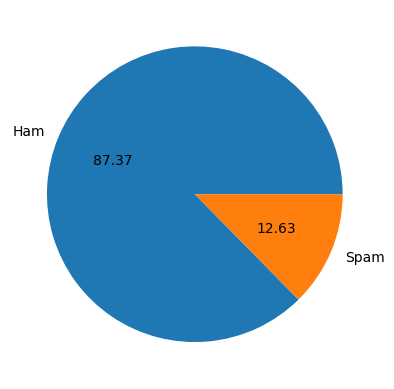

In [282]:
# To plot the piechart we will use the matplotlib library of python!
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham','Spam'], autopct='%0.2f')
plt.show() # To remove the xtra piece of code we used this

In [283]:
# From the above pie chart we can conclude that the ham messages are >>>> spam messages, means data is imbalanced, now we will create 3 more colums of our own for deeper analysis of the data provided
# We will create 3 cols of number of characters, number of words, number of sentences in the sms!

In [284]:
import nltk # For the above analysis we need to use nltk library

In [285]:
nltk.download('punkt') # There are some dependencies that nltk use, so we will run this intruction to download those depenndencies!

[nltk_data] Downloading package punkt to C:\Users\Utkarsh
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [286]:
df['num_characters'] = df['Text'].apply(len) # This is will calculate the number of characters in the msg and then will store it in another column!

In [287]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [288]:
# Now we will fetch number of words in the msgs!
# df['Text'].apply(lambda x : nltk.word_tokenize(x)) # This intruction will break all the msg in form of short words and will put them in a list!
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x))) # The above instruction will form that list, and now we just have to count the number of elements in the list, for that we have used the len function
# After counting number of words in the list, we added them into a another column!

In [289]:
df.head() # Displaying the whole data frame!

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [290]:
# Now we will fetch number of sentences in a msg!
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x))) # This intruction will break all the msg in form of sentences and will put them in a list!
# After counting number of sentences in the list, we added them into a another column!

In [291]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [292]:
# Now we will analyse all the above columns using describe function...
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [293]:
# From the above tables we can notice that, on an average 78 characters are used, 18 words are used and approx 2 sentences are used
# And max to max in a message, 910 characters are used, 220 words are used and 38 sentences are used!
# In the above table we have analysed it for in general all msgs...
# But now we will analyse it for specifically for ham msgs...
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [294]:
# Now we can analyse the same thing for spam msgs also...
# just put 1 in pace of 0...
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [295]:
# And from the above table we can notice that average words or characters or sentences used in a spam msgs are more than ham msgs!
# means spam msgs are a bit longer than ham msgs...
# Now lets plot a histogram for the above spam vs ham data...
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

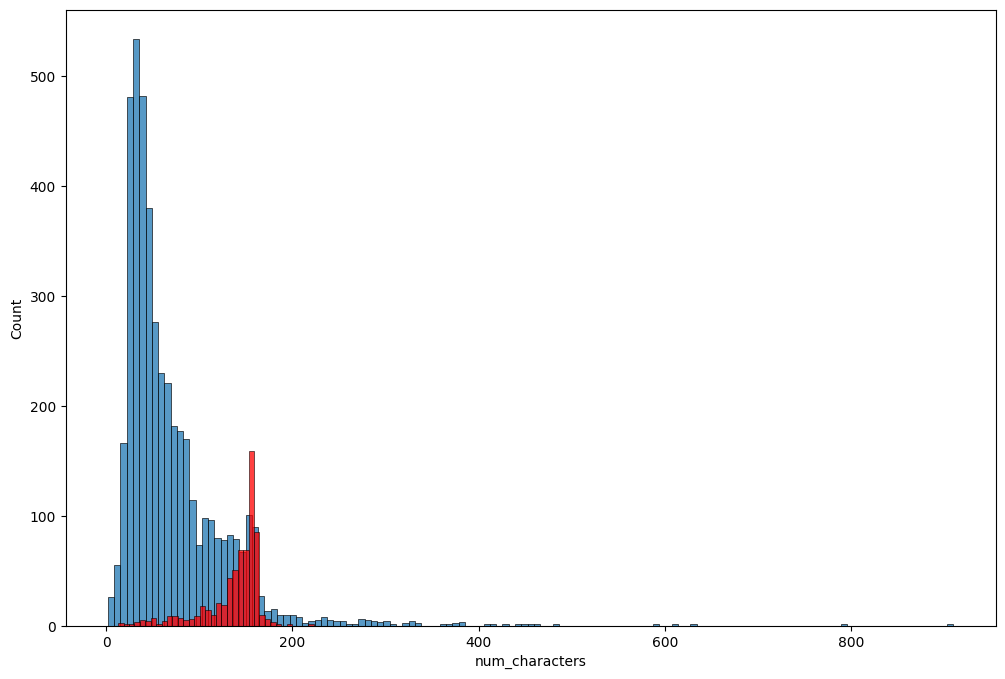

In [296]:
plt.figure(figsize=(12,8)) # To increase the size of the graph!
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')
# The above instructions is used to plot a histogram for the number of characters used in spam and ham msgs!

<Axes: xlabel='num_words', ylabel='Count'>

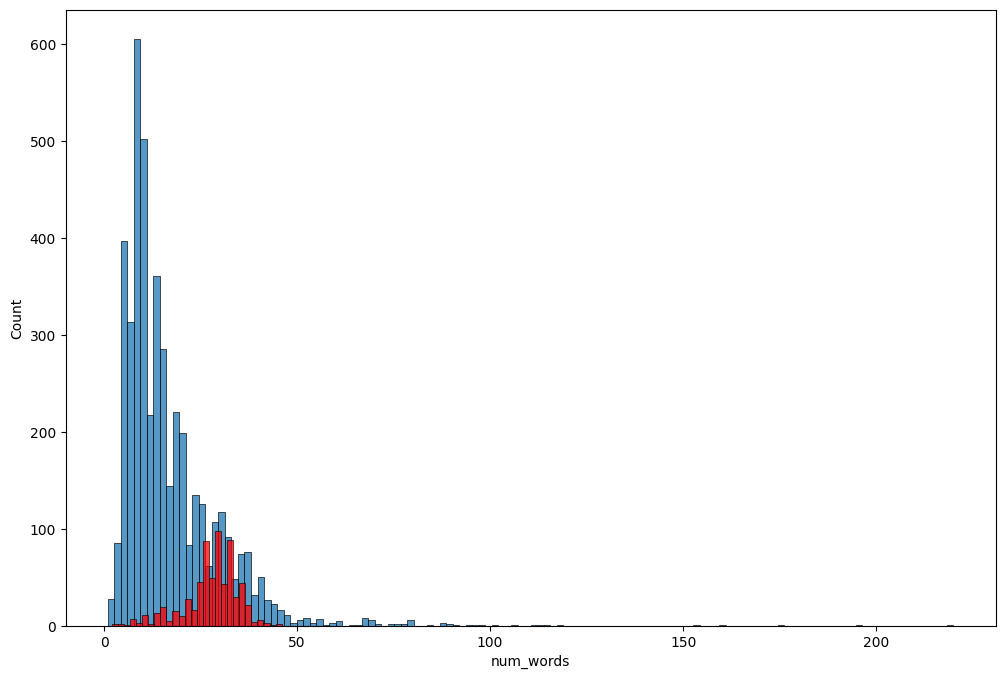

In [297]:
plt.figure(figsize=(12,8)) # To increase the size of the graph!
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')
# The above instructions will plot the histogram for the num_words and count in spam and ham!

<Axes: xlabel='num_sentences', ylabel='Count'>

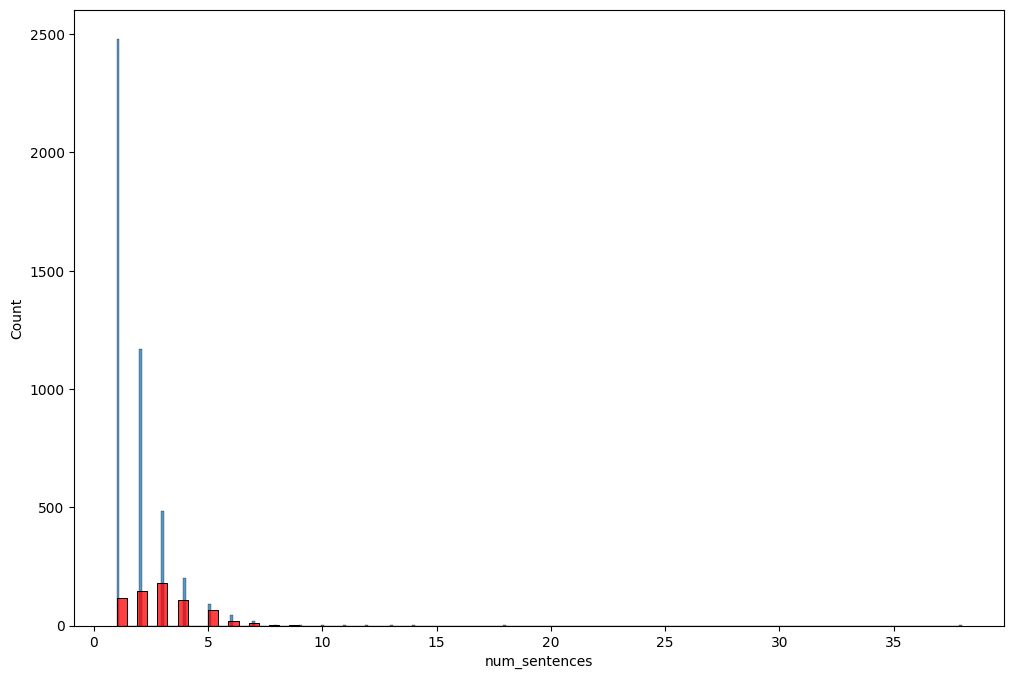

In [298]:
plt.figure(figsize=(12,8)) # To increase the size of the graph!
sns.histplot(df[df['Target'] == 0]['num_sentences'])
sns.histplot(df[df['Target'] == 1]['num_sentences'],color='red')

c:\Users\Utkarsh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


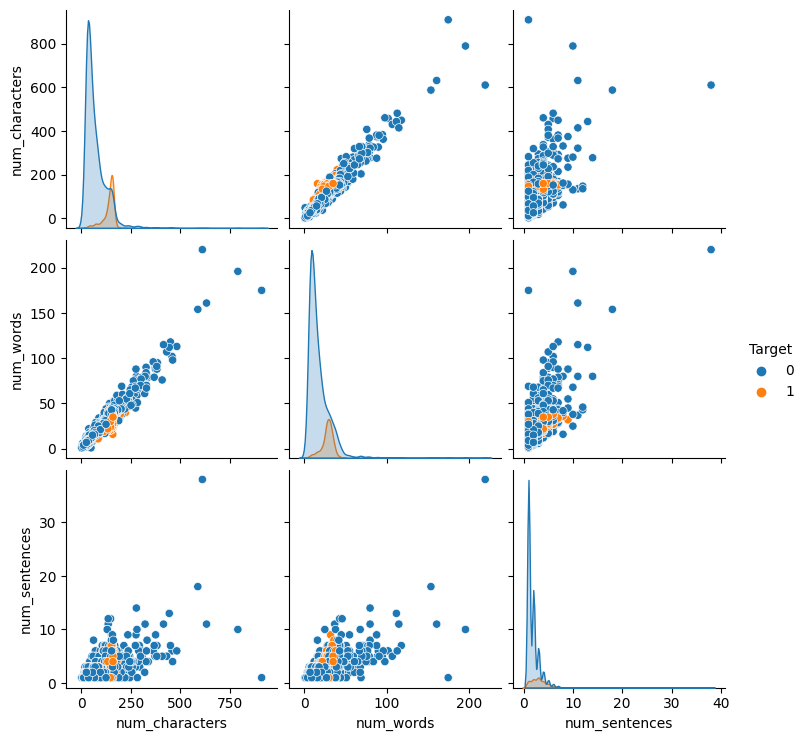

In [299]:
# Another thing we can analyse is that, what is the relation between the num_words and num_characters and similarly other....
sns.pairplot(df,hue='Target')

In [300]:
# df.drop(columns=['Text'], inplace=True) # Here wanted to find a correlation between the cols and generate a heatmap, but that we can't do for string values,
# and here text column contained all the string values, so we needed to remove it, hence we removed it.... and now we applies this operation...

In [301]:
# df.head()

In [302]:
# Generating heatmap for the given data...
# sns.heatmap(df.corr(),annot=True)
# Through this heatmap we can also find some correlations between the cols and data!

## 3. Data Pre Processing

1. First we will convert all the textual data into lower case
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and Punctuation
5. Stemming

In [303]:
# Downloading all the stopwords for the further use...
import nltk
nltk.download('stopwords') # Through this command we downloaded all the stopwords and now we will see what are those stopwords!

[nltk_data] Downloading package stopwords to C:\Users\Utkarsh
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [304]:
# from nltk.corpus imported stopwords library for further use in removing all the stopwords using transform_text function!
from nltk.corpus import stopwords
stopwords.words('english') # In this instruction we have displayed all the stopwords! for demo!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [305]:
# Imported String library for for further use in removing all the punctuations using the transform_text function!
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [306]:
# Now lastly we are left with stemming in the data preprocessing...
# Hence, importing this module/library to apply stemming in data using the transform_text function!
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Singing') # It will remove the "ing" part of the text...now we will apply the same logic in that transform_text function!

'sing'

In [307]:
# Creating a function to convert all the characters of the msg into lower case and then tokenize it (means the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens)!
def transform_text(text) :
    # Step 1 : Converting Texts to lower case
    text = text.lower()
    text = nltk.word_tokenize(text) # Tokenization

    # Step 2 : Tokenization and removing all the special characters
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
    
    # Step 3 : Remvoving all the stopwords and punctuations
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [308]:
# From the above code we have done converting to lower case, done tokenization and then removing special characters!
# And then will remove all the stop words and punctuations!

In [309]:
# Example 1 to show the usage of the transform_text() function...
transform_text('Hi My name is Utkarsh Verma and I am 20% Years Old') # just an example to show the use of the tranform_text function's use! as it will conver the whol.e text into lower case and then tokenize it and then append them into the string!

'hi name utkarsh verma 20 year old'

In [310]:
# Example 2 to show the usage of the transform_text() function...
transform_text('This is my project of SMS Spam Detection, in Machine learning!')
# As we can see that the transform_text functiom converted all the text into lower case and then it removed all the punctuations, tokenized all the elements, removed all the stopwords!

'project sm spam detect machin learn'

In [311]:
# Example 2 to show the usage of the transform_text() function after applying all the processing upto stemming...
transform_text('This is my Project on SMS Spam Detection, in Machine learning!')

'project sm spam detect machin learn'

In [312]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [313]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [314]:
# Now we will generate a word cloud for the preprocessed data! for Spam Msgs!
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

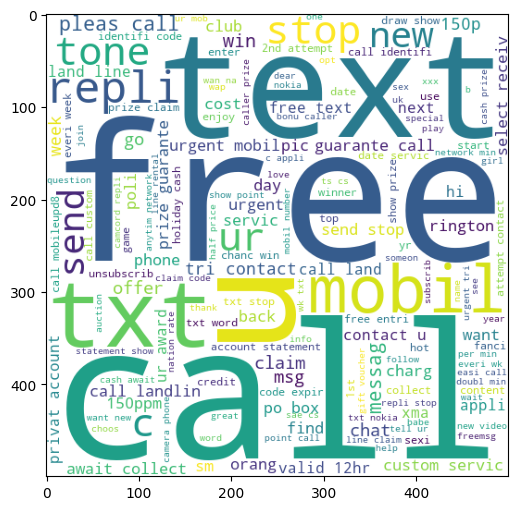

In [315]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

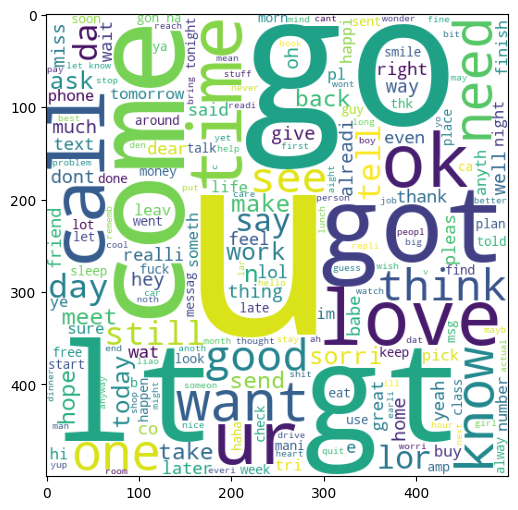

In [316]:
# Generating the wordcloud for Ham Msgs!
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [317]:
# After generating the word clouds for both the spam and ham msgs, now we will find, which word is used mostly in the spam and ham msgs! in the provided data!
# We will see the top 30 words!
df.head() # This is our current data frame! now we will look for the top 30 spam and ham msgs!

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [318]:
# df[df['Target'] == 1] # This will give you all the spam msgs!
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [319]:
len(spam_corpus) # It will show that there are in total 9941 words in Spam msgs given in the data set!

9941

## 4. Model Building

In [320]:
# Now as now we will begin with model building and we will use the naive bayes algo, as generally it works best on the textual data, but to give the data as input we need to convert it into numbers, as the NB algo uses numrical inputs to work!
# And here in the data frame we have 2 input cols, Transformed text and Targetr col, and out of which target col is already in numerical format, but we need to convert the Transformed text into numerical format!
# For that we will perform vectorization!
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # First we have used this vectorizer and performed the three algos and it turns out to be that bnb works the best when we use this vectorizer, but to improve the results we then switched to tfidf vectorizer...
tfidf = TfidfVectorizer()

In [321]:
# X = cv.fit_transform(df['Transformed_text']).toarray()
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [322]:
X.shape

(5169, 6677)

In [323]:
y = df['Target'].values

In [324]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [325]:
# Selecting model to perform predictive analysis!
from sklearn.model_selection import train_test_split

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [327]:
# Including three naive bayes based algos...and will check there output one by one, using both the vectorizers and then will conclude which one we will be using going forward!
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [328]:
# Creating objects for each model!
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [329]:
# Performing the predictive analysis using the gnb algo using both the vectorizers and it turned out to be that it performs poorly in both the vectorizers!
# So we will go for the other two!
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [330]:
# Performing the predictive analysis using the mnb algo using both the vectorizers and it turned out to be that it performs excellent with tfidf and performs pretty good also with count vectorizer!
# also it gives 100% precsion with tfidf and 95% accuracy with count vectorizer!
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [331]:
# It performs great with count vectorizer but not that good with tfidf
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# Hence we will be choosing the mnb algo for the futher analysis!

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [332]:
# And hence when we switched to tfidf vectorizer it turns out to be that mnb precision score increased alot!
# Hence we will use the mnb algo with tfidf vectorizer!

In [335]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))